In [1]:
# Libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import GlobalAveragePooling2D,Conv2D, MaxPool2D
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [4]:
# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/train', target_size=(64, 64),batch_size=32, class_mode='binary')
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator =test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/test',target_size=(64, 64),batch_size=32, class_mode='binary')


Found 556 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [6]:
# Build the Enhanced CNN Model
cnn = tf.keras.Sequential([
# Initial Convolutional Layer
tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
input_shape=(64, 64, 3)),
tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
tf.keras.layers.BatchNormalization(),
# Second Convolutional Layer
tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
tf.keras.layers.BatchNormalization(),
# Third Convolutional Layer
tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
tf.keras.layers.BatchNormalization(),
# Flatten Layer to Prepare for Fully Connected Layers
tf.keras.layers.Flatten(),
# First Dense Layer with ReLU Activation and Dropout
tf.keras.layers.Dense(units=256, activation='relu'),
tf.keras.layers.Dropout(0.5), # Adding dropout for regularization
tf.keras.layers.BatchNormalization(),
# Second Dense Layer with ReLU Activation and Dropout
tf.keras.layers.Dense(units=128, activation='relu'),
tf.keras.layers.Dropout(0.5), # Adding dropout for regularization
tf.keras.layers.BatchNormalization(),
# Output Layer with Sigmoid Activation for Binary Classification
# (cat/dog)
tf.keras.layers.Dense(units=1, activation='sigmoid')])
# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])
# Train the model
history = cnn.fit(x=train_generator, validation_data=validation_generator,
epochs=100)
# Increased Epochs: (as here i have taken 100)
# We will increase the number of training epochs to allow the model more
# time to learn the features of the dataset.

Epoch 1/100
18/18 [==============================] - 289s 16s/step - loss: 0.9095 - accuracy: 0.5126 - val_loss: 0.6985 - val_accuracy: 0.5071
Epoch 2/100
18/18 [==============================] - 15s 834ms/step - loss: 0.7363 - accuracy: 0.6223 - val_loss: 0.7141 - val_accuracy: 0.4929
Epoch 3/100
18/18 [==============================] - 13s 700ms/step - loss: 0.7443 - accuracy: 0.5989 - val_loss: 0.6932 - val_accuracy: 0.5357
Epoch 4/100
18/18 [==============================] - 12s 674ms/step - loss: 0.7579 - accuracy: 0.5899 - val_loss: 0.7049 - val_accuracy: 0.5286
Epoch 5/100
18/18 [==============================] - 13s 699ms/step - loss: 0.7294 - accuracy: 0.6007 - val_loss: 0.6938 - val_accuracy: 0.5571
Epoch 6/100
18/18 [==============================] - 14s 767ms/step - loss: 0.6605 - accuracy: 0.6727 - val_loss: 0.6959 - val_accuracy: 0.5857
Epoch 7/100
18/18 [==============================] - 12s 661ms/step - loss: 0.6369 - accuracy: 0.6637 - val_loss: 0.6961 - val_accuracy: 

In [7]:
# make single prediction
#here we are making single prediction taking dog as my test picture
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Dataset/prediction/predict2.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print(result)
print(prediction)

1/1 [==============================] - 0s 204ms/step
[[1.]]
dog


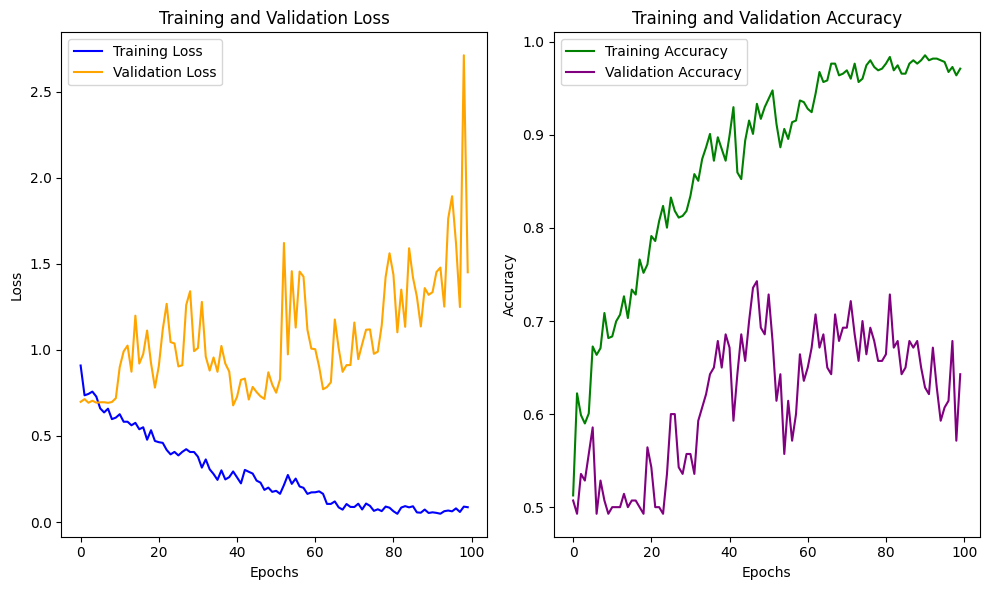

In [8]:
plt.figure(figsize=(10, 6))# Plot training and validation metrics
# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss',
color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.subplot(1, 2, 2) # Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy',
color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',
color='purple')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()